In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [2]:
labels_or = pd.read_csv("data/labels.csv")

In [3]:
# path
path_train = "data/train/"
# get top 10 breeds
top_10 = labels_or['breed'].value_counts()[:10].index

cor = dict([(breed, idx) for idx, breed in enumerate(top_10)])

In [4]:
def process_data(top_10,path_train,cor,labels_or):
    Xs = []
    ys = []
    for idx, val in enumerate(top_10):
        # aux 
        aux = top_10[~np.isin(np.arange(top_10.size),idx)]
        # divide choosen label and not choosen 
        labels = labels_or.loc[labels_or['breed'] == top_10[idx]]

        filenames = [path_train + fname + ".jpg" for fname in labels['id']]

        y = np.array([cor[breed] for breed in labels['breed']])

        # Resize images

        IMG_SIZE = 150

        imgs = []
        for fname in filenames:
            img = cv2.imread(fname)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imgs.append(cv2.resize(img, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC))

        imgs = np.array(imgs)

        X = imgs.reshape(imgs.shape[0],imgs.shape[1]*imgs.shape[2]*imgs.shape[3])
        X = X / 255
        
        Xs.append(X)
        ys.append(y)
    y_ = []
    X_ = []
    for i in range(len(Xs)):
        for j in range(len(Xs[i])):
            X_.append(Xs[i][j])
            y_.append(ys[i][j])
    X = np.array(X_)
    y = np.array(y_)
    
    return X, y

In [5]:
X, y = process_data(top_10,path_train,cor,labels_or)

In [13]:
X.shape

(1141, 67500)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [7]:
rfc = RandomForestClassifier(random_state=0)
y_train_pred = cross_val_predict(rfc, X_train, y_train, cv=3)

In [8]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[29, 11, 10, 10, 10,  2, 10,  4,  3,  8],
       [10, 34,  0,  6,  1,  5, 18, 11,  2, 11],
       [19,  9, 15, 14,  9,  5,  7,  4,  4,  6],
       [14,  3,  8, 28, 36,  2,  3,  0,  1,  3],
       [ 7,  1,  7, 33, 32,  3,  0,  4,  0,  2],
       [ 8, 15,  6,  7,  8, 10, 11, 11,  5,  5],
       [ 5, 24,  1,  5,  5,  6, 17, 10,  3, 16],
       [ 9,  6,  5,  3,  4,  4,  7, 34, 10,  7],
       [12,  9,  8,  9,  8,  7,  3, 14,  9,  6],
       [ 8, 17,  3,  2,  3,  3, 23,  5,  3, 19]])

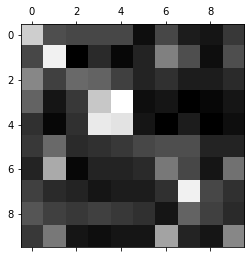

In [9]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [11]:
rfc_f = RandomForestClassifier(random_state=0)
rfc_f.fit(X_train, y_train)

y_test_pred = rfc_f.predict(X_test)

conf_mx_f = confusion_matrix(y_test, y_test_pred)
conf_mx_f

array([[14,  2,  1,  5,  1,  1,  0,  4,  0,  1],
       [ 1, 10,  1,  0,  0,  0,  4,  2,  0,  1],
       [ 6,  1,  6,  2,  2,  0,  2,  3,  1,  1],
       [ 3,  0,  2,  5,  5,  0,  0,  0,  2,  0],
       [ 1,  1,  3,  9,  9,  0,  2,  0,  0,  0],
       [ 2,  4,  3,  3,  1,  3,  3,  5,  0,  2],
       [ 1,  4,  0,  0,  2,  1,  3,  4,  0,  4],
       [ 1,  5,  2,  0,  2,  0,  1,  8,  1,  2],
       [ 4,  4,  1,  2,  1,  0,  2,  4,  6,  1],
       [ 1, 10,  0,  1,  0,  1,  2,  1,  1,  6]])

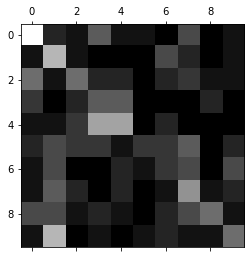

In [12]:
plt.matshow(conf_mx_f,cmap=plt.cm.gray)